In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn.utils.prune as prune
import numpy as np
from transformers import RobertaConfig, RobertaModel
from transformers import GPT2Tokenizer, GPT2Model
from transformers import T5Tokenizer, T5Model
from transformers import BartTokenizer, BartModel

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
2022-11-09 02:08:57.003800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 02:08:57.329351: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-09 02:08:57.406165: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

In [132]:
# tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
# model = BartModel.from_pretrained('facebook/bart-base')
model = GPT2Model.from_pretrained('gpt2')

torch.Size([124439808])


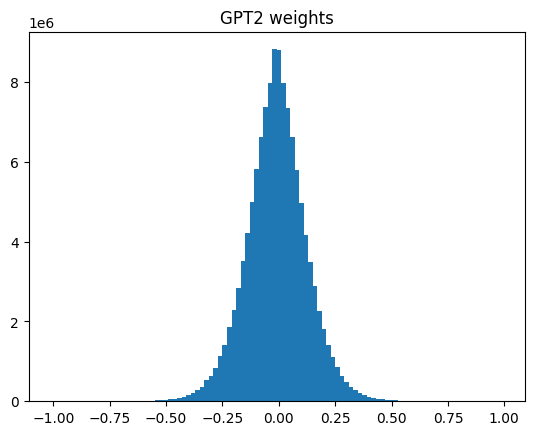

In [24]:
##gpt2 
##only 100M params 

s = []
for param in model.parameters():
    p = torch.flatten(param)
    s.append(p)
s = torch.cat(s)
print(s.shape)

# bins = torch.FloatTensor([-1, -0.1, -0.001, -0.0001, -0.00001, 0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1])
hist = torch.histogram(s, bins=100, range=(-1,1))
bin_edges = hist.bin_edges.detach().numpy()
bars = hist.hist.detach().numpy()
width = np.diff(bin_edges)
plt.title("GPT2 weights")
plt.bar(bin_edges[:-1], bars,width=width)
plt.savefig("gpt2_weights.png")

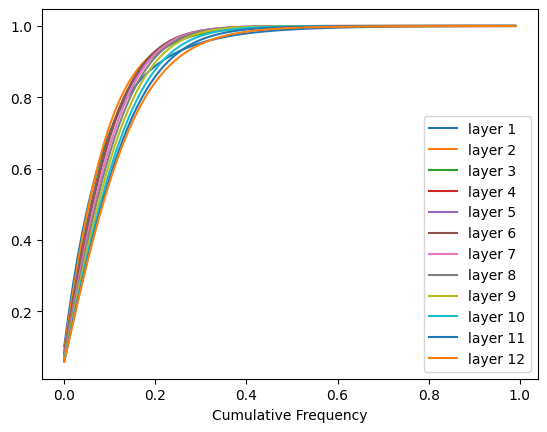

In [134]:
ct = 0
for param in model.h:
    try:
        j = torch.abs(torch.cat([p.flatten() for p in param.parameters()]))
        ct += 1
        hist = torch.histogram(j, bins=100, range=(0,1))
        bin_edges = hist.bin_edges.detach().numpy()
        heights = hist.hist.detach().numpy()
        heights=np.cumsum(heights) / torch.numel(j)
        plt.plot(bin_edges[:-1],heights,label=f'layer {ct}')
    except Exception as e:
        print(e)
#     print(j)
#     for p in param.parameters():
#         print(p)
plt.legend()
plt.xlabel("GPT2 Weight Value")
plt.xlabel("Cumulative Frequency")
plt.savefig('layer_weights_gpt2.png')

In [17]:
bartmodel = BartModel.from_pretrained("facebook/bart-base")

In [114]:
dir(model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_auto_class',
 '_backward_compatibility_gradient_checkpointing',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_can_retrieve_inputs_from_name',
 '_convert_head_mask_to_5d',
 '_create_repo',
 '_expand_inputs_for_generation',
 '_extract_past_from_model_output',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_from_config',
 '_get_backward_hooks',
 '_get_decoder_start_token_id',
 '_get_files_timestamps',
 '_get_logits_processor',
 '_get_logits_warper',
 '_get_name',
 '_get_resized_embeddings',
 '_get_resized_lm_head',
 '_get_stopp

In [85]:
l = [b for b in bartmodel.encoder.layers]
d = [b for b in bartmodel.decoder.layers]

6

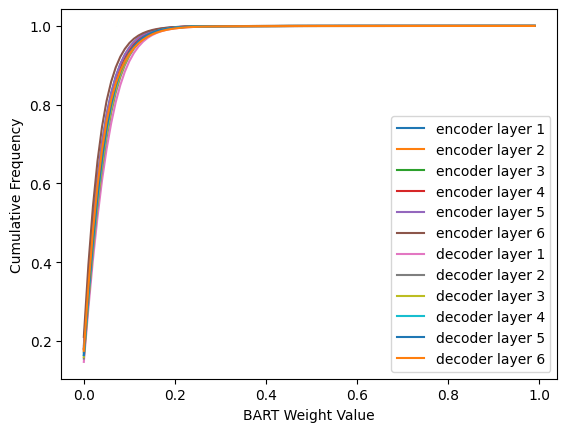

In [135]:
ct = 0
for b in l:
#     layers = [s for s in b.parameters()]
#     print(b)
#     print(len(layers))
    j = torch.abs(torch.cat([p.flatten() for p in b.parameters()]))
    ct += 1
#     bins = torch.FloatTensor([0,0.00001,0.0001,0.001,0.01,0.1,1,10])
    hist = torch.histogram(j, bins=100, range=(0,1))
    bin_edges = hist.bin_edges.detach().numpy()
    heights = hist.hist.detach().numpy()
    heights=np.cumsum(heights) / torch.numel(j)
    plt.plot(bin_edges[:-1],heights,label=f'encoder layer {ct}')
ct = 0
for b in d:
    j = torch.abs(torch.cat([p.flatten() for p in b.parameters()]))
    ct += 1
#     bins = torch.FloatTensor([0,0.00001,0.0001,0.001,0.01,0.1,1,10])
    hist = torch.histogram(j, bins=100, range=(0,1))
    bin_edges = hist.bin_edges.detach().numpy()
    heights = hist.hist.detach().numpy()
    heights= np.cumsum(heights) / torch.numel(j)
    plt.plot(bin_edges[:-1],heights,label=f'decoder layer {ct}')
plt.legend()
plt.xlabel("BART Weight Value")
plt.ylabel("Cumulative Frequency")
plt.savefig("bart_layer.png")

torch.Size([139420416])


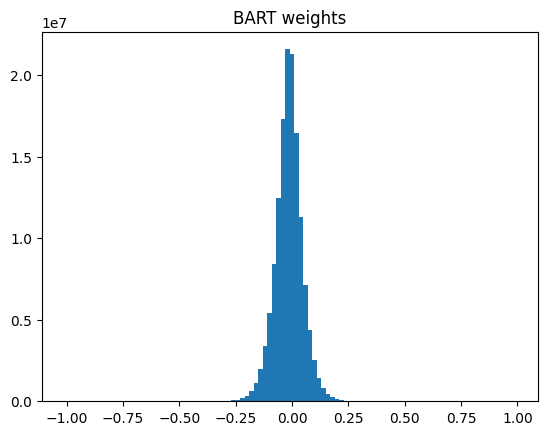

In [136]:
s = []
for param in bartmodel.parameters():
    p = torch.flatten(param)
    s.append(p)
s = torch.cat(s)
print(s.shape)

# bins = torch.FloatTensor([-1, -0.1, -0.001, -0.0001, -0.00001, 0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1])
hist = torch.histogram(s, bins=100, range=(-1,1))
bin_edges = hist.bin_edges.detach().numpy()
heights = hist.hist.detach().numpy()
width = np.diff(bin_edges)
plt.title("BART weights")
plt.bar(bin_edges[:-1], heights,width=width)
plt.savefig("bart_weights.png")

In [20]:
roberta_model = RobertaModel.from_pretrained("roberta-base")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


torch.Size([124645632])


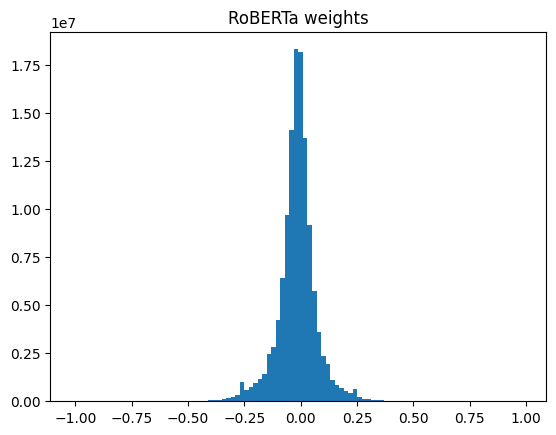

In [137]:
s = []
for param in roberta_model.parameters():
    p = torch.flatten(param)
    s.append(p)
s = torch.cat(s)
print(s.shape)

# bins = torch.FloatTensor([-1, -0.1, -0.001, -0.0001, -0.00001, 0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1])
hist = torch.histogram(s, bins=100, range=(-1,1))
bin_edges = hist.bin_edges.detach().numpy()
heights = hist.hist.detach().numpy()
width = np.diff(bin_edges)
plt.title("RoBERTa weights")
plt.bar(bin_edges[:-1], heights,width=width)
plt.savefig("roberta_weights.png")

In [120]:
roberta_model

RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0): RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropout): Drop

In [127]:
layers = [s for s in roberta_model.encoder.layer]


12


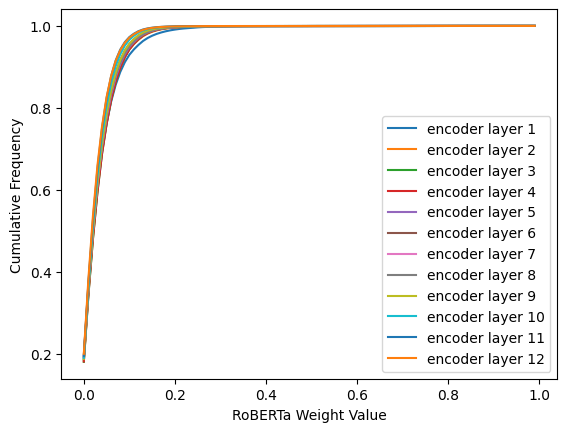

In [139]:
ct = 0
for b in layers:
    j = torch.abs(torch.cat([p.flatten() for p in b.parameters()]))
    ct += 1
#     bins = torch.FloatTensor([0,0.00001,0.0001,0.001,0.01,0.1,1,10])
    hist = torch.histogram(j, bins=100, range=(0,1))
    bin_edges = hist.bin_edges.detach().numpy()
    heights = hist.hist.detach().numpy()
    heights= np.cumsum(heights) / torch.numel(j)
    plt.plot(bin_edges[:-1],heights,label=f'encoder layer {ct}')
plt.legend()
plt.xlabel("RoBERTa Weight Value")
plt.ylabel("Cumulative Frequency")
plt.savefig("roberta_layer.png")

In [121]:
dir(roberta_model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_auto_class',
 '_backward_compatibility_gradient_checkpointing',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_can_retrieve_inputs_from_name',
 '_convert_head_mask_to_5d',
 '_create_repo',
 '_expand_inputs_for_generation',
 '_extract_past_from_model_output',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_from_config',
 '_get_backward_hooks',
 '_get_decoder_start_token_id',
 '_get_files_timestamps',
 '_get_logits_processor',
 '_get_logits_warper',
 '_get_name',
 '_get_resized_embeddings',
 '_get_resized_lm_head',
 '_get_stopp

torch.Size([124439808])


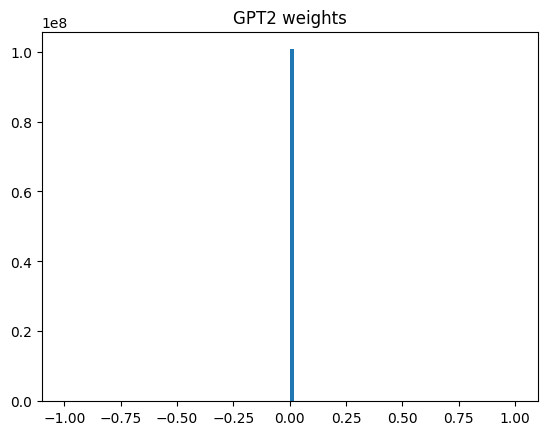

In [15]:
s = []
for param in model2.parameters():
    p = torch.flatten(param)
    s.append(p)
s = torch.cat(s)
print(s.shape)

hist = torch.histogram(s, bins=100, range=(-1,1))
bin_edges = hist.bin_edges.detach().numpy()
heights = hist.hist.detach().numpy()
width = [2/100]*100
plt.title("GPT2 weights")
plt.bar(bin_edges[:100], height=heights, width=width, align='edge')
plt.show()

In [20]:


roberta_model = RobertaModel.from_pretrained("roberta-base")

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [27]:
model.h

ModuleList(
  (0): GPT2Block(
    (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (attn): GPT2Attention(
      (c_attn): Conv1D()
      (c_proj): Conv1D()
      (attn_dropout): Dropout(p=0.1, inplace=False)
      (resid_dropout): Dropout(p=0.1, inplace=False)
    )
    (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (mlp): GPT2MLP(
      (c_fc): Conv1D()
      (c_proj): Conv1D()
      (act): NewGELUActivation()
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (1): GPT2Block(
    (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (attn): GPT2Attention(
      (c_attn): Conv1D()
      (c_proj): Conv1D()
      (attn_dropout): Dropout(p=0.1, inplace=False)
      (resid_dropout): Dropout(p=0.1, inplace=False)
    )
    (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (mlp): GPT2MLP(
      (c_fc): Conv1D()
      (c_proj): Conv1D()
      (act): NewGELUActivation()
      (dropout): Dropout(p=0.1, inplace=False)
    )


In [92]:
s= []
for param in t5model.parameters():
    p = torch.flatten(param)
    s.append(p)
s = torch.cat(s)
print(s.shape)

torch.Size([222903552])


In [5]:
def get_children(m): 
    child = [c for c in m.children()]
    if len(child) > 0: 
        res = []
        for c in child:
            for x in get_children(c):
                res.append(x)
        return res
    else:
        return [m]
    
    

In [6]:
def get_prune_layers_no_bias(model):
    to_prune = []
    layers = get_children(model)
    for l in layers:
        p = l.named_parameters()
        for obj in p:
            if obj[0] == 'weight' or obj[0] == 'weight_orig':
                to_prune.append((l,obj[0]))
                
    return to_prune
                

def get_prune_layers_with_bias(model):
    to_prune = []
    layers = get_children(model)
    for l in layers:
        p = l.named_parameters()
        for obj in p:
            to_prune.append((l,obj[0]))
            
    return to_prune
    

In [7]:
def full_model_prune(model, sparsity):
#     model.toggle_pruning(True)
    to_prune = get_prune_layers_no_bias(model)
    print(to_prune)
    
    prune.global_unstructured(
        to_prune,
        pruning_method=prune.L1Unstructured,
        amount=sparsity,)
    
    print('finished prune')
    for (layer,name) in to_prune:
        print('in remove')
        print(list(layer.named_buffers()))
        prune.remove(layer, name)


    
    return model
    

In [15]:


t5model = T5Model.from_pretrained("t5-small")


In [17]:
m = full_model_prune(t5model,0.1)


[(Embedding(32128, 512), 'weight'), (Embedding(32128, 512), 'weight'), (Linear(in_features=512, out_features=512, bias=False), 'weight'), (Linear(in_features=512, out_features=512, bias=False), 'weight'), (Linear(in_features=512, out_features=512, bias=False), 'weight'), (Linear(in_features=512, out_features=512, bias=False), 'weight'), (Embedding(32, 8), 'weight'), (T5LayerNorm(), 'weight'), (Linear(in_features=512, out_features=2048, bias=False), 'weight'), (Linear(in_features=2048, out_features=512, bias=False), 'weight'), (T5LayerNorm(), 'weight'), (Linear(in_features=512, out_features=512, bias=False), 'weight'), (Linear(in_features=512, out_features=512, bias=False), 'weight'), (Linear(in_features=512, out_features=512, bias=False), 'weight'), (Linear(in_features=512, out_features=512, bias=False), 'weight'), (T5LayerNorm(), 'weight'), (Linear(in_features=512, out_features=2048, bias=False), 'weight'), (Linear(in_features=2048, out_features=512, bias=False), 'weight'), (T5LayerNo

[('weight_mask', tensor([[0., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 0., 0.],
        [1., 0., 0.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 0., 1., 1.],
        [1., 1., 1.,  ..., 1., 0., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([[1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 

[('weight_mask', tensor([[0., 1., 1.,  ..., 1., 0., 0.],
        [1., 0., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 0.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 0., 1.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

[('weight_mask', tensor([[0., 1., 1.,  ..., 0., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 0., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 1., 0.,  ..., 1., 0., 1.],
        [1., 1., 1.,  ..., 1., 1., 0.],
        [1., 0., 1.,  ..., 0., 1., 1.]]))]
[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 0., 0.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 0., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
    

[('weight_mask', tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.,

[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 0., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 0.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1

[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 0., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 1., 1.,  ..., 1., 1., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

[('weight_mask', tensor([1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.,

[('weight_mask', tensor([[1., 1., 1.,  ..., 0., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 0., 0.]]))]
[('weight_mask', tensor([[1., 0., 1.,  ..., 1., 1., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 0., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 0., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 0.]]))]
[('weight_mask', tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
    

[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 0., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

[('weight_mask', tensor([[1., 0., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 0., 1., 1.],
        [1., 1., 0.,  ..., 1., 0., 1.]]))]
[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 0., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 0., 1.],
        [0., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 0.,  ..., 1., 1., 1.]]))]
[('weight_mask', tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
    

In [12]:
s= []
for param in m.parameters():
    p = torch.flatten(param)
    s.append(p)
s = torch.cat(s)
print(s.shape)

torch.Size([60506624])


In [40]:
model.config.pad_token_id = model.config.eos_token_id
print(model.config.pad_token_id)

50256


In [12]:
layers = get_prune_layers_no_bias(t5model)
print(layers)

[(Embedding(32128, 512), 'weight'), (Embedding(32128, 512), 'weight'), (Embedding(32128, 512), 'weight')]


75
